# Bitcoin Price Forecasting and Sentiment Predictor Using Twitter Data Part 2: Baseline Modelling

## Table of Contents

### Introduction

### 1. Sentiment Analysis

### 2. Bitcoin Price Prediction

### 3. Tweet Data Processing

### 4. Bitcoin Pricing Data Processing

### 5. Baseline Modelling

### Conclusion

# Introduction

In this second part of the project, we delve deeper into preprocessing, EDA, and establish our baseline models. The objective is to perform sentiment analysis on a collection of Bitcoin-related tweets and utilize these findings, combined with Bitcoin pricing data, for predictive modeling. This workflow will conduct a sentiment analysis, data preprocessing for both the Tweets dataset and Bitcoin Price dataset, modeling using a Random Forest Regressor, and visualizations to evaluate model performance.


## 1. Sentiment Analysis

### 1.1 Importing Libraries & Loading Data

We begin by setting up our environment, importing necessary libraries, and loading the Bitcoin tweet dataset.



In [2]:
import pandas as pd
bitcointweets= pd.read_csv("~/Downloads/bitcoin_tweets1000000.csv", encoding='ISO-8859-1')


/var/folders/n9/pydr1fpn3pz3xvl2kpqw585w0000gn/T/ipykernel_94268/1479037430.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bitcointweets= pd.read_csv("~/Downloads/bitcoin_tweets1000000.csv", encoding='ISO-8859-1')


In [3]:
bitcointweets.head()

,Unnamed: 0,date,cleanText
0,0,44237.9993518519,blue ridge bank shares halted nyse bitcoin atm...
1,1,44237.9991666667,today thursday take friend leowandersleb btc w...
2,2,44237.9963888889,guys evening read article btc would like share
3,3,44237.9962152778,btc big chance billion price bitcoin btc crypto
4,4,44237.9959027778,network secured nodes today soon biggest bears...


### 1.2 Setting up Sentiment Analysis Libraries

For sentiment analysis, we're going to use the TextBlob library. Let's install and import it.

In [4]:
pip install TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 7.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In this section, the code starts by importing necessary libraries, including pandas for data manipulation, matplotlib for visualization, and TextBlob for sentiment analysis. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In this section, we conduct sentiment analysis for Bitcoin-related tweets. This process involves:

- Cleaning the dataset to remove rows with missing tweet content.
- Calculating sentiment polarity using TextBlob.
- Categorizing sentiment scores into labels: Positive, Neutral, or Negative.


In [6]:
# Drop rows with missing 'cleanText' values
bitcointweets = bitcointweets.dropna(subset=['cleanText'])

# Extract the tweets and perform sentiment analysis
tweets = bitcointweets['cleanText']

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the tweets
bitcointweets['Sentiment_Polarity'] = tweets.apply(get_sentiment)

In [7]:
# Categorize sentiments into labels (Positive, Neutral, Negative)
def label_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

bitcointweets['Sentiment_Label'] = bitcointweets['Sentiment_Polarity'].apply(label_sentiment)


Next, we visualize the distribution of sentiment categories.

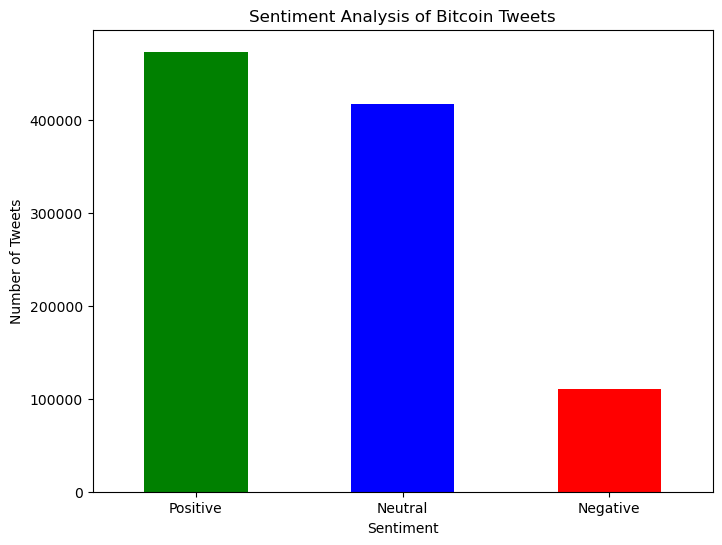

In [8]:
# Count the sentiment distribution
sentiment_counts = bitcointweets['Sentiment_Label'].value_counts()

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Bitcoin Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

Key Insights:

- Positive sentiments dominate the Bitcoin tweets landscape, indicating an optimistic discourse among Twitter users discussing Bitcoin.
- Neutral sentiments also occupy a significant portion, suggesting informational or factual discussions.
- Negative sentiments are relatively lesser, pointing towards fewer users expressing negative views or concerns.


### 1.4 Sentiment Analysis Results

By calculating the average sentiment polarity and visualizing the sentiment distribution, we can gauge the overall mood of the Bitcoin community on Twitter.

In [9]:
# Calculate the average sentiment polarity
average_sentiment = bitcointweets['Sentiment_Polarity'].mean()

# Display the results
print("Sentiment Distribution:")
print(sentiment_counts)
print("\nAverage Sentiment Polarity:", average_sentiment)


Sentiment Distribution:
Positive    472937
Neutral     416645
Negative    110405
Name: Sentiment_Label, dtype: int64

Average Sentiment Polarity: 0.1446919683343556


The results show that Positive sentiment is the most prevalent, with 472,937 tweets falling into this category. Neutral sentiment comes next, with 416,645 tweets, and Negative sentiment is observed in 110,405 tweets.

Key Insights:

- The Positive sentiment's prevalence signifies optimism or positive perspectives towards Bitcoin.
- An average sentiment polarity of approximately 0.145 points towards a general positive sentiment.

The calculated average sentiment polarity, which is approximately 0.145, signifies an overall positive sentiment in the dataset. This value provides a quantifiable measure of the sentiment orientation, offering insights into the collective sentiment sentiment conveyed in the analyzed Bitcoin tweets.







## 2. Bitcoin Price Prediction

### 2.1 Data Preprocessing for Tweets: Date variation

The date is a pivotal variable in our analysis. Proper alignment of dates enables us to effectively integrate tweet data with Bitcoin price data.

**Using both Tweets data and Pricing data**

We started by assigning the previously processed tweets data with the polarity scores to a dataset called tweets_df 

In [10]:
tweets_df = bitcointweets

In [11]:
tweets_df['decimal_column'] = pd.to_numeric(tweets_df['date'], errors='coerce')
tweets_df.dropna(subset=['decimal_column'], inplace=True)

def convert_to_datetime(decimal_value):
    excel_epoch = pd.Timestamp('1899-12-30')
    days = int(decimal_value)
    time_in_seconds = int((decimal_value - days) * 86400)
    date_time = excel_epoch + pd.Timedelta(days, unit='D') + pd.Timedelta(seconds=time_in_seconds)
    return date_time.strftime('%Y-%m-%dT%H:%M:%S')

# Apply the conversion function to the entire column and create a new column with formatted datetime strings
tweets_df['NewDateTimeColumn'] = tweets_df['decimal_column'].apply(convert_to_datetime)

##renaming
tweets_df['NewDateTimeColumn'] = pd.to_datetime(tweets_df['NewDateTimeColumn'])

# Convert 'NewDateTimeColumn' to a datetime format
tweets_df['NewDateTimeColumn'] = pd.to_datetime(tweets_df['NewDateTimeColumn'])

# Extract the date from the datetime object and store it in a new 'Date' column
tweets_df['Date'] = tweets_df['NewDateTimeColumn'].dt.date

The aim for the previous code section is to set the dates appropriately. In fact, the date is a crucial variable that we will use to integrate both datasets. However it is loaded as decimal. So by converting decimal date values to formatted datetime string we've associated each tweet with a specific date and time. This alignment enables a seamless integration of the tweet data with the corresponding Bitcoin price data for the upcoming analysis

In [12]:
tweets_df.head(50)

,Unnamed: 0,date,cleanText,Sentiment_Polarity,Sentiment_Label,decimal_column,NewDateTimeColumn,Date
0,0,44237.9993518519,blue ridge bank shares halted nyse bitcoin atm...,0.000000,Neutral,44237.999352,2021-02-10 23:59:04,2021-02-10
1,1,44237.9991666667,today thursday take friend leowandersleb btc w...,0.000000,Neutral,44237.999167,2021-02-10 23:58:48,2021-02-10
2,2,44237.9963888889,guys evening read article btc would like share,0.000000,Neutral,44237.996389,2021-02-10 23:54:48,2021-02-10
3,3,44237.9962152778,btc big chance billion price bitcoin btc crypto,0.000000,Neutral,44237.996215,2021-02-10 23:54:33,2021-02-10
4,4,44237.9959027778,network secured nodes today soon biggest bears...,-0.250000,Negative,44237.995903,2021-02-10 23:54:06,2021-02-10
5,5,44237.9954861111,trade crypto binance enjoy cashback trading fe...,0.400000,Positive,44237.995486,2021-02-10 23:53:29,2021-02-10
6,6,44237.9953356481,fire amp man bitcoin crypto btc,0.000000,Neutral,44237.995336,2021-02-10 23:53:16,2021-02-10
7,7,44237.9949305556,prices update eur hour btc eth xrp,0.000000,Neutral,44237.994931,2021-02-10 23:52:42,2021-02-10
8,8,44237.9947337963,btc bitcoin ethereum eth crypto cryptotrading ...,0.000000,Neutral,44237.994734,2021-02-10 23:52:25,2021-02-10
9,9,44237.994537037,tesla bitcoin investment revolutionary crypto ...,0.000000,Neutral,44237.994537,2021-02-10 23:52:07,2021-02-10


In [13]:
tweets_df.drop('Unnamed: 0', axis=1, inplace=True)
tweets_df.drop('date', axis=1, inplace=True)
tweets_df.drop('decimal_column', axis=1, inplace=True)
tweets_df.drop(columns=['NewDateTimeColumn'], inplace=True)

In [14]:
# Remove duplicates
tweets_df.drop_duplicates(inplace=True)

# Drop NA values
tweets_df.dropna(inplace=True)

### 2.2 Text Analysis: Identifying Common Keywords

Let's extract insights from the tweet content by looking at the most frequently mentioned terms.

In [15]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize


In [16]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
df=tweets_df

# Convert the 'cleanText' column to string
df['cleanText'] = df['cleanText'].astype(str)

# Tokenize the text into words
nltk.download('punkt') 
df['cleanText'] = df['cleanText'].apply(word_tokenize)

# Flatten the list of words
all_words = [word.lower() for sublist in df['cleanText'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Extract the 5 most repeated keywords
most_common_keywords = word_counts.most_common(5)

print(dict(most_common_keywords))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/markbenhaim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'bitcoin': 773108, 'btc': 406272, 'crypto': 235401, 'cryptocurrency': 140321, 'project': 129758}


This code block performs basic text analysis on the 'cleanText' column of Bitcoin tweets. It converts the text data to lowercase, tokenizes it into words, and counts the occurrences of each word. The five most common keywords are then extracted and displayed, giving a quick insight into frequently mentioned terms within the tweets

Key Insights:

- The terms 'bitcoin', 'btc', 'crypto', 'cryptocurrency', and 'project' emerge as the most frequently mentioned, indicating these are primary areas of discussion or focus.

### 2.3 Constructing a Consolidated DataFrame

Using the most frequent keywords and sentiment data, we create a consolidated view that captures sentiment and keyword trends over time.

In [18]:
df1=tweets_df.copy(deep=True)

In [19]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

most_common_keywords1 = dict(most_common_keywords).keys()


# Create a new DataFrame for the result
result_df = pd.DataFrame()

# Add the 'Date' column to the result DataFrame
result_df['Date'] = pd.to_datetime(df1['Date']).dt.date
result_df['Sentiment_Polarity'] = df1['Sentiment_Polarity']
# Add columns for the 5 most repeated keywords
for keyword in most_common_keywords1:
    result_df[keyword] = df1['cleanText'].apply(lambda x: x.count(keyword))

# Perform the group-by operation to sum the counts for each date
result_df = result_df.groupby('Date', as_index=False).sum()

This code section utilizes the most common keywords identified earlier. It creates a new DataFrame named result_df and populates it with relevant information. The 'Date' column, sentiment polarity values, and counts of the most common keywords are added to this DataFrame. Through grouping the data by date, the resulting DataFrame offers a consolidated view of sentiment polarity and the occurrence of top keywords over time.

## 3. Tweet Data Processing

### 3.1 Tweet Date Alignment

The initial data is in result_df. We want to ensure that the date is the index, and the DataFrame covers our desired time range chronologically.

In [21]:
import numpy as np


# Create the initial DataFrame
result_df = pd.DataFrame(result_df)

# Define the desired date range
start_date = pd.to_datetime('2021-02-05')
end_date = pd.to_datetime('2021-08-21')
date_range = pd.date_range(start=start_date, end=end_date)

# Set 'Date' column as the index
result_df.set_index('Date', inplace=True)

# Reindex the DataFrame with the desired date range and fill NaNs with 'NA'
result_df_filled = result_df.reindex(date_range).fillna(np.nan)

# Reset the index to include the 'Date' column in the DataFrame
result_df_filled.reset_index(inplace=True)

# Print the updated DataFrame with missing dates added and NaNs filled with 'NA'
result_df_filled.head()



,index,Sentiment_Polarity,bitcoin,btc,crypto,cryptocurrency,project
0,2021-02-05,140.098886,1029.0,953.0,357.0,200.0,9.0
1,2021-02-06,237.324746,1869.0,1847.0,481.0,264.0,45.0
2,2021-02-07,241.506293,1414.0,1288.0,438.0,170.0,27.0
3,2021-02-08,461.410933,4093.0,3589.0,919.0,420.0,35.0
4,2021-02-09,347.056392,2790.0,2486.0,590.0,431.0,38.0


When working with time-series data in this case tweets data that isn't continuous, we set a 3 day moving average for the entries with missing timestamps, making the data more comprehensive and easier to track and visualize.
It's important to note that using a 3 day moving average can affect our analyses. However, based on the dataset we have publicly available for tweets this was the overall best method in order to include the full dataset

In [22]:
# Define the desired date range
start_date = pd.to_datetime('2021-02-05')
end_date = pd.to_datetime('2021-08-21')
date_range = pd.date_range(start=start_date, end=end_date)


# Reindex the DataFrame with the desired date range and fill NaNs with 'NA'
result_df_filled = result_df.reindex(date_range).fillna(np.nan)

for col in result_df_filled.columns:
    for i in range(2, len(result_df_filled)):
        if pd.isna(result_df_filled.at[date_range[i], col]):
            non_na_values = result_df_filled[col].iloc[i-3:i].dropna()
            if len(non_na_values) > 0:
                result_df_filled.at[date_range[i], col] = non_na_values.mean()


# Reset the index to include the 'Date' column in the DataFrame
result_df_filled.reset_index(inplace=True)

By filling gaps using a moving average, we're approximating the activity based on recent trends

In [23]:
# Print the updated DataFrame with missing dates added and NaNs filled using moving average
result_df_filled.head(30)

,index,Sentiment_Polarity,bitcoin,btc,crypto,cryptocurrency,project
0,2021-02-05,140.098886,1029.000000,953.000000,357.000000,200.000000,9.000000
1,2021-02-06,237.324746,1869.000000,1847.000000,481.000000,264.000000,45.000000
2,2021-02-07,241.506293,1414.000000,1288.000000,438.000000,170.000000,27.000000
3,2021-02-08,461.410933,4093.000000,3589.000000,919.000000,420.000000,35.000000
4,2021-02-09,347.056392,2790.000000,2486.000000,590.000000,431.000000,38.000000
5,2021-02-10,247.723367,1980.000000,1746.000000,494.000000,247.000000,24.000000
6,2021-02-11,352.063564,2954.333333,2607.000000,667.666667,366.000000,32.333333
7,2021-02-12,315.614441,2574.777778,2279.666667,583.888889,348.000000,31.444444
8,2021-02-13,157.530119,1347.000000,1269.000000,541.000000,158.000000,27.000000
9,2021-02-14,237.394025,1937.000000,1734.000000,505.000000,287.000000,22.000000


In this code segment, the goal is to maintain chronological order in the absence of complete data. Since there might be days with no available tweets, a new DataFrame is created. It's designed to cover a specified date range, ensuring every day is accounted for. Missing data points are filled with 'NaN', allowing for a continuous and consistent chronological sequence. This approach facilitates analysis and visualization while preserving the temporal context, even when some days lack corresponding tweet data.

In [24]:
result_df=result_df_filled
result_df.reset_index(drop=True, inplace=True)

new_column_names = {col: col + '_tweetcount' if col in result_df.columns[-6:] else col for col in result_df.columns}
result_df.rename(columns=new_column_names, inplace=True)
#result_df.drop('Date', axis=1, inplace=True)
result_df.head()

,index,Sentiment_Polarity_tweetcount,bitcoin_tweetcount,btc_tweetcount,crypto_tweetcount,cryptocurrency_tweetcount,project_tweetcount
0,2021-02-05,140.098886,1029.0,953.0,357.0,200.0,9.0
1,2021-02-06,237.324746,1869.0,1847.0,481.0,264.0,45.0
2,2021-02-07,241.506293,1414.0,1288.0,438.0,170.0,27.0
3,2021-02-08,461.410933,4093.0,3589.0,919.0,420.0,35.0
4,2021-02-09,347.056392,2790.0,2486.0,590.0,431.0,38.0


In this code section, we are observing the moving average approach to fill missing values in the DataFrame. 

In [25]:
result_df['total count'] = result_df.iloc[:, 1:].sum(axis=1)
result_df

,index,Sentiment_Polarity_tweetcount,bitcoin_tweetcount,btc_tweetcount,crypto_tweetcount,cryptocurrency_tweetcount,project_tweetcount,total count
0,2021-02-05,140.098886,1029.0,953.0,357.0,200.0,9.0,2688.098886
1,2021-02-06,237.324746,1869.0,1847.0,481.0,264.0,45.0,4743.324746
2,2021-02-07,241.506293,1414.0,1288.0,438.0,170.0,27.0,3578.506293
3,2021-02-08,461.410933,4093.0,3589.0,919.0,420.0,35.0,9517.410933
4,2021-02-09,347.056392,2790.0,2486.0,590.0,431.0,38.0,6682.056392
...,...,...,...,...,...,...,...,...
193,2021-08-17,3275.558679,23155.0,5366.0,6451.0,3901.0,4100.0,46248.558679
194,2021-08-18,3950.835364,25403.0,5916.0,7445.0,4410.0,5962.0,53086.835364
195,2021-08-19,3455.568001,24224.0,5824.0,6716.0,3952.0,4068.0,48239.568001
196,2021-08-20,3565.353615,26548.0,6756.0,7079.0,4105.0,3764.0,51817.353615


## 4.  Bitcoin Pricing Data Processing

### 4.1 Bitcoin Data Date Alignment

Here we extract the date from the bitcoin_data.csv and make sure it aligns with our tweet data.

In [28]:
bitcoin_df=pd.read_csv('~/Desktop/archive/myproject/notebook/bitcoin_data.csv')
bitcoin_df.head()

,time,open,Percent change in price (close/open),close,BTC Dominance Open,Percent change in dominance (close/open),BTC Dominance Close,Volume,RSI (relative strength index),HV (historical volatility)
0,2017-08-16T20:00:00-04:00,4261.48,0.5538%,4285.08,58.028157,-1.4775%,57.170801,795.150377,NaN,NaN
1,2017-08-17T20:00:00-04:00,4285.08,-4.1238%,4108.37,57.249988,-6.0952%,53.760514,1199.888264,NaN,NaN
2,2017-08-18T20:00:00-04:00,4108.37,0.7694%,4139.98,53.801715,1.0955%,54.391090,381.309763,NaN,NaN
3,2017-08-19T20:00:00-04:00,4120.98,-0.8418%,4086.29,54.375678,-1.8169%,53.387744,467.083022,NaN,NaN
4,2017-08-20T20:00:00-04:00,4069.13,-1.3057%,4016.00,53.348892,-2.0376%,52.261861,691.743060,NaN,NaN


In [29]:
bitcoin_df['Time'] = bitcoin_df['time'].str.replace(r'-\d{2}:\d{2}$', '', regex=True)
bitcoin_df['Time'] = pd.to_datetime(bitcoin_df['Time'])

bitcoin_df['Date'] = bitcoin_df['Time'].dt.date
bitcoin_df.drop('Time',axis=1, inplace=True)
bitcoin_df.head()

,time,open,Percent change in price (close/open),close,BTC Dominance Open,Percent change in dominance (close/open),BTC Dominance Close,Volume,RSI (relative strength index),HV (historical volatility),Date
0,2017-08-16T20:00:00-04:00,4261.48,0.5538%,4285.08,58.028157,-1.4775%,57.170801,795.150377,NaN,NaN,2017-08-16
1,2017-08-17T20:00:00-04:00,4285.08,-4.1238%,4108.37,57.249988,-6.0952%,53.760514,1199.888264,NaN,NaN,2017-08-17
2,2017-08-18T20:00:00-04:00,4108.37,0.7694%,4139.98,53.801715,1.0955%,54.391090,381.309763,NaN,NaN,2017-08-18
3,2017-08-19T20:00:00-04:00,4120.98,-0.8418%,4086.29,54.375678,-1.8169%,53.387744,467.083022,NaN,NaN,2017-08-19
4,2017-08-20T20:00:00-04:00,4069.13,-1.3057%,4016.00,53.348892,-2.0376%,52.261861,691.743060,NaN,NaN,2017-08-20


In [30]:
result_df.rename(columns={'index': 'Date'}, inplace=True)
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
result_df['Date'] = pd.to_datetime(result_df['Date'])

The DataFrame now contains a 'Date' column that represents the date component of the original time data. This step is essential for aligning the date information with the previously processed tweet data

### 4.2 Merge the Two Datasets with the Date Variable

When merging multiple datasets (like tweet data and pricing data), ensuring date consistency and alignment is crucial. This step guarantees accurate pairing and prevents misleading results due to misaligned data.

First we have to turn the columns: 'Percent change in price (close/open)' and 'Percent change in dominance (close/open)' from strings to float

In [43]:
merged_df['Percent change in price (close/open)'] = merged_df['Percent change in price (close/open)'].str.rstrip('%').astype('float') / 100.0
#                                                                                                    ^ use str funcs to elim '%'        ^ divide by 100

In [45]:
merged_df['Percent change in dominance (close/open)'] = merged_df['Percent change in dominance (close/open)'].str.rstrip('%').astype('float') / 100.0
#                                                                                                    ^ use str funcs to elim '%'        ^ divide by 100

In [31]:
merged_df = pd.merge(result_df, bitcoin_df, on='Date', how='inner')

In [46]:
merged_df.head(40)

,Date,Sentiment_Polarity_tweetcount,bitcoin_tweetcount,btc_tweetcount,crypto_tweetcount,cryptocurrency_tweetcount,project_tweetcount,total count,time,open,Percent change in price (close/open),close,BTC Dominance Open,Percent change in dominance (close/open),BTC Dominance Close,Volume,RSI (relative strength index),HV (historical volatility)
0,2021-02-05,140.098886,1029.000000,953.000000,357.000000,200.000000,9.000000,2688.098886,2021-02-05T19:00:00-05:00,38289.32,0.023443,39186.94,61.148604,0.012730,61.927055,98757.31118,64.624198,69.498654
1,2021-02-06,237.324746,1869.000000,1847.000000,481.000000,264.000000,45.000000,4743.324746,2021-02-06T19:00:00-05:00,39181.01,-0.009834,38795.69,61.884005,0.000632,61.923141,84363.67976,63.100905,56.331746
2,2021-02-07,241.506293,1414.000000,1288.000000,438.000000,170.000000,27.000000,3578.506293,2021-02-07T19:00:00-05:00,38795.69,0.195361,46374.87,61.909107,0.037875,64.253913,138589.68870,75.264492,109.652820
3,2021-02-08,461.410933,4093.000000,3589.000000,919.000000,420.000000,35.000000,9517.410933,2021-02-08T19:00:00-05:00,46374.86,0.000982,46420.42,64.185033,-0.013727,63.303987,115499.86170,75.317153,109.586593
4,2021-02-09,347.056392,2790.000000,2486.000000,590.000000,431.000000,38.000000,6682.056392,2021-02-09T19:00:00-05:00,46420.42,-0.034744,44807.58,63.088062,-0.023384,61.612823,97154.18220,69.661876,109.721702
5,2021-02-10,247.723367,1980.000000,1746.000000,494.000000,247.000000,24.000000,4738.723367,2021-02-10T19:00:00-05:00,44807.58,0.070567,47969.51,61.587189,0.012657,62.366702,89561.08145,73.813212,111.096200
6,2021-02-11,352.063564,2954.333333,2607.000000,667.666667,366.000000,32.333333,6979.396897,2021-02-11T19:00:00-05:00,47968.66,-0.014198,47287.60,62.346091,-0.024008,60.849260,85870.03570,71.539657,113.692464
7,2021-02-12,315.614441,2574.777778,2279.666667,583.888889,348.000000,31.444444,6133.392218,2021-02-12T19:00:00-05:00,47298.15,-0.003054,47153.69,60.771005,-0.006395,60.382398,63768.09740,71.076669,113.222434
8,2021-02-13,157.530119,1347.000000,1269.000000,541.000000,158.000000,27.000000,3499.530119,2021-02-13T19:00:00-05:00,47156.78,0.030134,48577.79,60.402156,0.022162,61.740807,73735.47553,73.072529,110.197216
9,2021-02-14,237.394025,1937.000000,1734.000000,505.000000,287.000000,22.000000,4722.394025,2021-02-14T19:00:00-05:00,48580.47,-0.013779,47911.10,61.709071,0.000686,61.751426,79398.15678,70.615830,112.454165


In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      198 non-null    datetime64[ns]
 1   Sentiment_Polarity_tweetcount             198 non-null    float64       
 2   bitcoin_tweetcount                        198 non-null    float64       
 3   btc_tweetcount                            198 non-null    float64       
 4   crypto_tweetcount                         198 non-null    float64       
 5   cryptocurrency_tweetcount                 198 non-null    float64       
 6   project_tweetcount                        198 non-null    float64       
 7   total count                               198 non-null    float64       
 8   time                                      198 non-null    object        
 9   open                            

## 5.  Baseline Modelling

### 5.1 Data Preparation for Modeling and Training Random Forest Regressor

Before building our model, we select the relevant features and split the dataset into training and test sets. We will utilize a Random Forest Regressor to predict Bitcoin prices.

Here are the features we will be assessing: features = ['Sentiment_Polarity_tweetcount',  'bitcoin_tweetcount', 'btc_tweetcount', 'crypto_tweetcount', 'cryptocurrency_tweetcount', 'project_tweetcount', 'total count', 'Percent change in dominance (close/open)', 'BTC Dominance Close', 'Volume', 'RSI (relative strength index)', 'HV (historical volatility)']

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming merged_df contains the data

# Select features and target variable
features = ['Sentiment_Polarity_tweetcount',  'bitcoin_tweetcount', 'btc_tweetcount', 'crypto_tweetcount', 'cryptocurrency_tweetcount', 'project_tweetcount', 'total count','Percent change in price (close/open)', 'Percent change in dominance (close/open)', 'BTC Dominance Close', 'Volume', 'RSI (relative strength index)', 'HV (historical volatility)']
target = 'close'

# Create a new dataframe with selected features
df = merged_df[features + [target]]

# Drop rows with missing values
df = df.dropna()

# Split the data into features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7966865551362414


Result: R-squared: 0.7966865551362414

The Random Forest Regressor is utilized for predicting Bitcoin prices based on the selected features. The choice of the Random Forest algorithm is due to its ability to handle complex relationships in data and provide reliable predictions in regression tasks. 

Given that the goal is to predict Bitcoin prices (a continuous variable), the task is framed as a regression problem. The selected features, encompassing both tweet sentiment metrics and Bitcoin-related data, are used as predictors. The target variable, 'close', represents the Bitcoin price that we aim to predict.

To prepare the data for modeling, rows with missing values are removed, ensuring a clean dataset for training and testing. The data is then split into training and testing sets, with 80% used for training and 20% for testing.

The Random Forest Regressor is instantiated with 100 estimators (decision trees) and a random seed of 42 for reproducibility. The model is trained on the training data.

Using the trained model, predictions are made on the test set, and the coefficient of determination (R-squared) is calculated to assess the model's performance. The R-squared value provides insights into the proportion of the variance in the actual Bitcoin prices that can be explained by the features included in the model.

In summary, the Random Forest Regressor is chosen for its effectiveness in capturing complex relationships, and the code leverages this algorithm to predict Bitcoin prices based on a combination of tweet sentiment and Bitcoin-related features. The R-squared value helps evaluate the model's predictive capability, indicating the extent to which the selected features can explain the variability in Bitcoin prices.

Insight: The Random forests are robust for a variety of data, but they might not capture certain time-series trends as effectively as more advanced machine learning models

### 5.2 Feature Importance Visualization

A crucial aspect of the Random Forest Regressor model is visualized: the feature importance. The goal is to understand which features play a significant role in predicting Bitcoin prices.

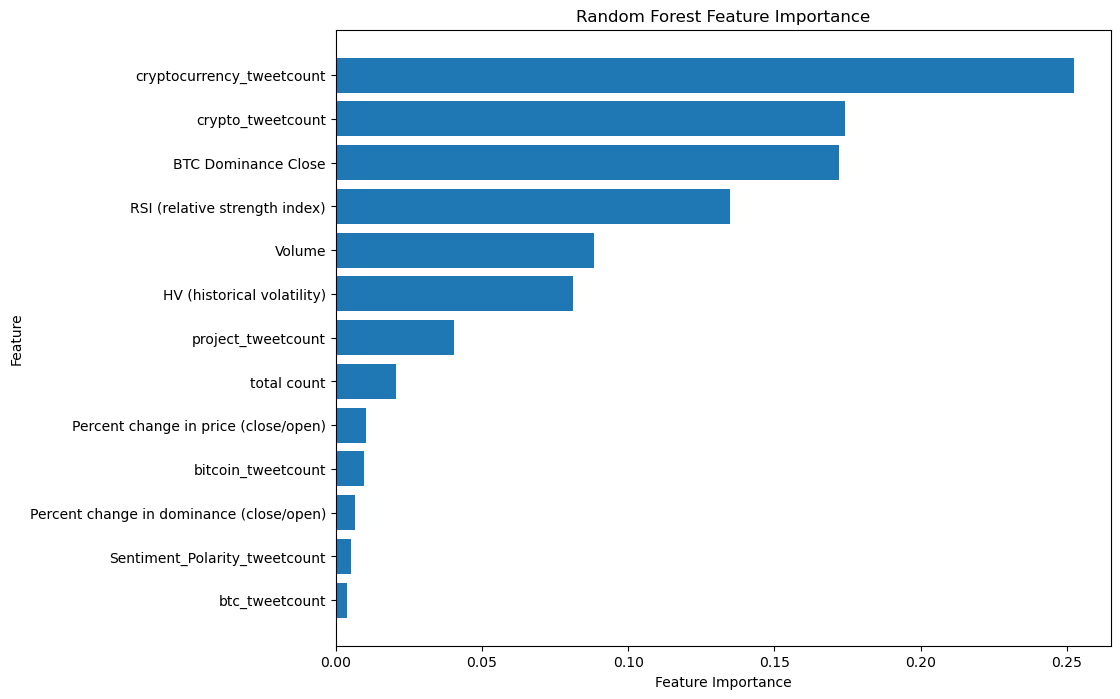

In [51]:

feature_importances = model.feature_importances_
feature_names = features
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_names)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

Several factors prominently influence the Random Forest Regressor model's ability to predict Bitcoin prices. Among these, "BTC Dominance Close", "Cryptocurrency Tweet Count", "RSI (Relative Strength Index)", "Crypto Tweet Count", "Volume" and "HV (Historical Volatility)" emerge as the most significant contributors to the model's predictive accuracy. 

This plot helps in understanding which features significantly impact the model's predictions and can help guide future data collection or feature engineering work.

### 5.3 Scatter Plot: Actual vs. Predicted Prices

This visualization helps in comparing the actual prices with the model's predictions.

Linear Regression R^2 value: 0.9496


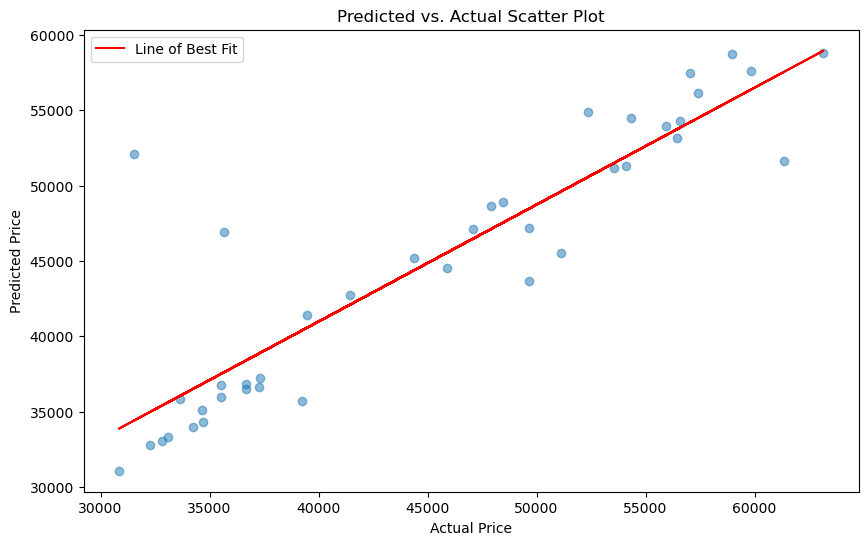

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Create line of best fit
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Line of Best Fit')

# Compute R squared value
reg = LinearRegression().fit(y_test.values.reshape(-1, 1), y_pred)
y_pred_line = reg.predict(y_test.values.reshape(-1, 1))
r2 = r2_score(y_test, y_pred_line)
print(f"Linear Regression R^2 value: {r2:.4f}")

# Label plot
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Scatter Plot')
plt.legend()
plt.show()


Results: Linear Regression R^2 value: 0.9496

Visual comparison of actual vs. predicted values displays a strong positive linear relationship. This plot offers an intuitive way to assess the model's overall performance

### 5.4 Line Plot: Actual vs. Predicted Prices Over Time

This plot offers a temporal perspective on the model's predictions.

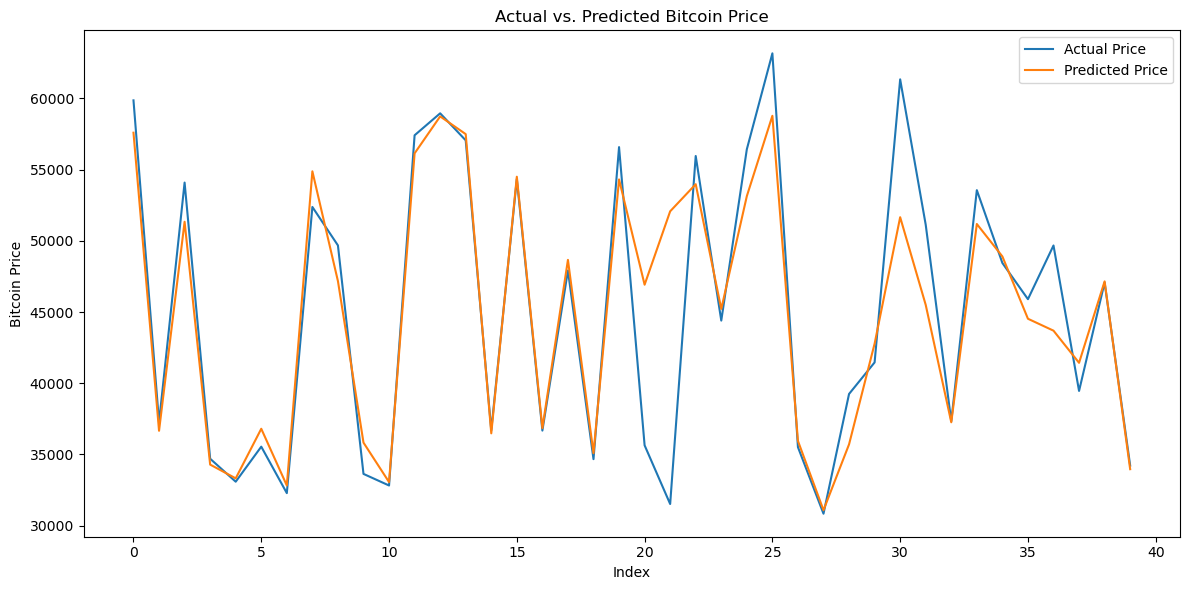

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs. predicted prices without considering time
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Price')
plt.plot(range(len(y_test)), y_pred, label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Bitcoin Price')

plt.title('Actual vs. Predicted Bitcoin Price')
plt.tight_layout()

plt.legend()
plt.show()

The graph provides a clear visual assessment of how closely the model's predictions align with the actual price values. By comparing the two lines, insights can be gained into the model's overall performance in predicting Bitcoin prices across the test dataset. 

## Next Steps:

1. Modeling with Other Algorithms:

- Explore alternative machine learning models, like nearual networks and support vector machines, to compare their performances with the Random Forest model.

2. Model Evaluation:

- Beyond just R-squared, consider other metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE). A combination of metrics can provide a more holistic view of the model's performance.

3. Fine-Tune Model Parameters:

- Utilize techniques like grid search, confusion matrix or random search to optimize hyperparameters for the model. This can significantly improve performance and predictive accuracy.

4. Cross-Validation:

- Implement K-fold cross-validation to ensure that the model is not overfitting and can generalize well to unseen data.

5. Comprehensive Workflow:

- Once various other models, evaluation metrics, and cross-validation strategies have been explored, combine these elements into a cohesive pipeline. This pipeline can be used for future predictions, making the entire process more streamlined and efficient.

## Conclusion:

The project analyzed the relationship between tweet sentiments related to Bitcoin and Bitcoin's actual pricing data. Data preparation and preprocessing were vital, especially when dealing with time-series data that had gaps. The Random Forest model showcased a promising ability to predict Bitcoin prices, with an R-squared value indicating a good fit. The most influential features in the prediction were "BTC Dominance," "Cryptocurrency Tweet Count," "RSI," and "Crypto Tweet Count."

Visually, the model's predictions closely followed the actual Bitcoin prices, demonstrating its potential utility. However, the field of predictive modeling for cryptocurrency prices is complex and continually evolving. While the current model is robust, it's essential to continually refine and test it against new data. Future work should also consider the impact of external events (like regulatory changes or macroeconomic factors) on Bitcoin prices.